In [26]:
from transmorph.datasets import load_spirals

In [32]:
spirals = load_spirals()
list_anndatas = list(spirals.values())
list_anndatas

[AnnData object with n_obs × n_vars = 433 × 3
     obs: 'label',
 AnnData object with n_obs × n_vars = 663 × 3
     obs: 'label']

In [30]:
from transmorph.engine import Model
from transmorph.engine.layers import (
    LayerInput, 
    LayerTransformation, 
    LayerMatching, 
    LayerMerging, 
    LayerOutput
)
from transmorph.engine.matching import MNN
from transmorph.engine.merging import LinearCorrection
from transmorph.engine.transforming import (
    CommonFeatures,
    Standardize,
    PCA
)

In [31]:
# I -> T -> Mt -> Mg -> O
linput = LayerInput()
lmatch = LayerMatching(MNN(n_neighbors=10))
lmerge = LayerMerging(LinearCorrection(n_neighbors=10))
lout = LayerOutput()

# Connecting layers
linput.connect(lmatch)
lmatch.connect(lmerge)
lmerge.connect(lout)

# Initializing model
model = Model(input_layer=linput)

In [33]:
model.fit(list_anndatas, reference=list_anndatas[1])

MODEL > Transmorph model is initializing.
MODEL > Ready to start the integration of 2 datasets, 1096 total samples.
MODEL > Running layer LAYER_INPUT#10.
MODEL > Running layer LAYER_MATCHING#11.
LAYER_MATCHING#11 > Calling matching MATCHING_MNN.
MODEL > Running layer LAYER_MERGING#12.
LAYER_MERGING#12 > Running merging MERGING_LINEAR_CORRECTION...
MODEL > Running layer LAYER_OUTPUT#13.
MODEL > Terminated. Total embedding shape: (1096, 3)


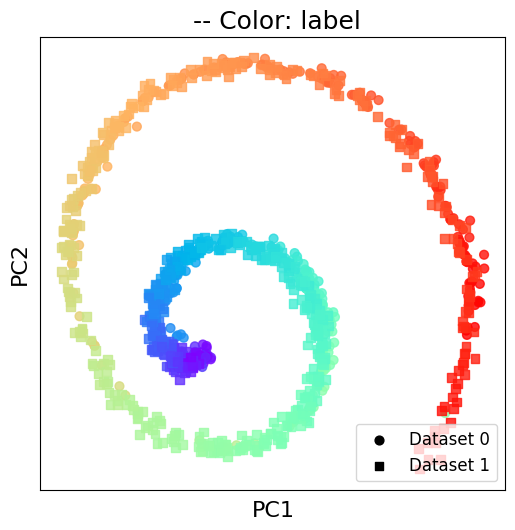

In [35]:
from transmorph.utils.plotting import scatter_plot

scatter_plot(list_anndatas, color_by="label", reducer="pca")